In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('marketing_campaign.csv',delimiter='\t')

In [3]:
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [4]:
list(data.columns)

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [5]:
data.shape

(2240, 29)

In [6]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

* We have 24 null values only in 'Income' column.  

In [7]:
data = data.dropna()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

* The "Education","Marital_Status" and "Dt_Customer" are in ojbect Datatype and we should convert before feeding to model

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2216.0,5588.353339,3249.376275,0.0,2814.75,5458.5,8421.75,11191.0
Year_Birth,2216.0,1968.820397,11.985554,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.00,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.00,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.00,49.0,74.00,99.0
MntWines,2216.0,305.091606,337.327920,0.0,24.00,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.00,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.00,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.00,12.0,50.00,259.0


* The features "Z_CostContact" and "Z_Revenue" have 0.00 varience.
* We should remove these columns 

In [10]:
data.drop('Z_Revenue',axis=1,inplace=True)
data.drop('Z_CostContact',axis=1,inplace=True)

In [11]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

### Data Visualization 

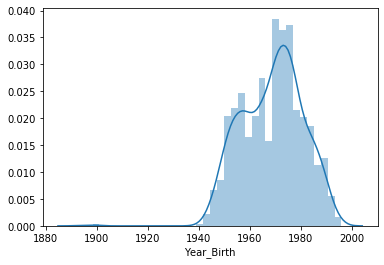

In [12]:
sns.distplot(data['Year_Birth'])

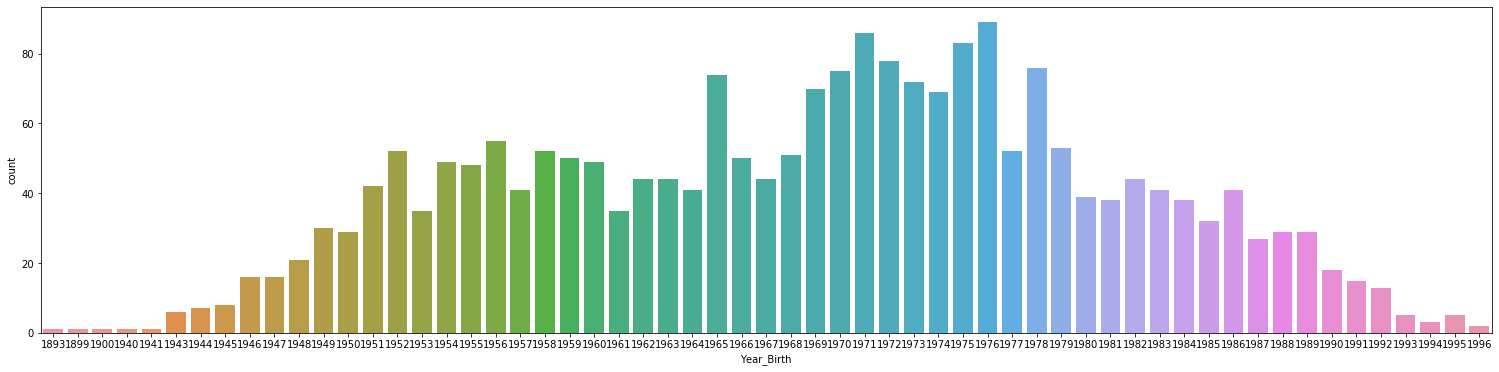

In [13]:
plt.figure(figsize=(26,6))
sns.countplot(data['Year_Birth'])

(array([  3.,   0.,   0.,   0.,  15., 298., 533., 678., 502., 187.]),
 array([1893. , 1903.3, 1913.6, 1923.9, 1934.2, 1944.5, 1954.8, 1965.1,
        1975.4, 1985.7, 1996. ]),
 <a list of 10 Patch objects>)

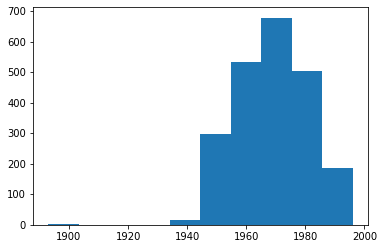

In [14]:
plt.hist(data['Year_Birth'])

#### * We can say that most of the customers are born between 1940 to 1996

In [15]:
data['Education'] = data['Education'].replace(['PhD','Master','2n Cycle'],'Post Graduate')
data['Education'] = data['Education'].replace(['Graduation','Basic'],'Under Graduate')
data['Education'].unique()

array(['Under Graduate', 'Post Graduate'], dtype=object)

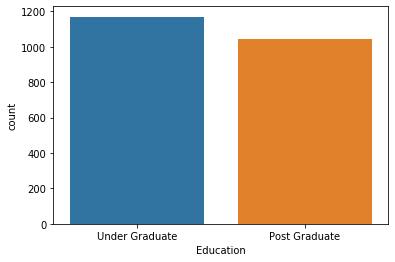

In [16]:
sns.countplot(data['Education'])

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

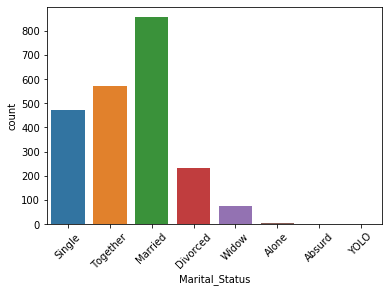

In [17]:
sns.countplot(data['Marital_Status'])
plt.xticks(rotation=45)

In [18]:
data['Marital_Status'] = data['Marital_Status'].replace(['Together','Married'],'Relationship')
data['Marital_Status'] = data['Marital_Status'].replace(['Single','Divorced','Widow','Alone','Absurd','YOLO'],'Single')
data['Marital_Status'].unique()

array(['Single', 'Relationship'], dtype=object)

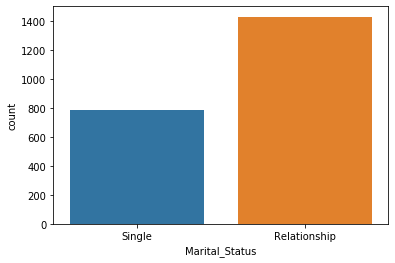

In [19]:
sns.countplot(data['Marital_Status'])

* We can say that most of our customers are in relationship

In [20]:
print(data['Kidhome'].unique())

[0 1 2]


* So, 0 mean there is no kid, 1 mean they have 1 kid and 2 mean they they have 2 kids 

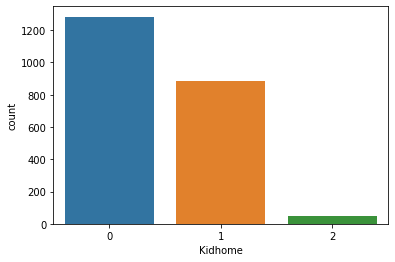

In [21]:
sns.countplot(data['Kidhome'])


In [22]:
print(data['Teenhome'].unique())

[0 1 2]


* Here, 0 mean there is no teenager, 1 mean there is 1 teen and 2 mean there are 2 teenagers.

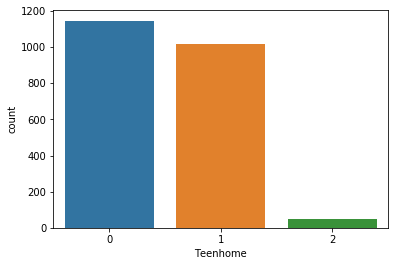

In [23]:
sns.countplot(data['Teenhome'])


In [24]:
# we can add both 'kidhome' and 'teenhome' for total_no_kids

data['Total_kids'] = data['Kidhome'] + data['Teenhome']
data['Total_kids'].unique()

array([0, 2, 1, 3], dtype=int64)

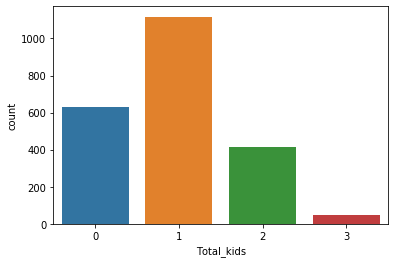

In [25]:
sns.countplot(data['Total_kids'])

#### * We can say that atleast 1 kid or teenager is living eith the customer 

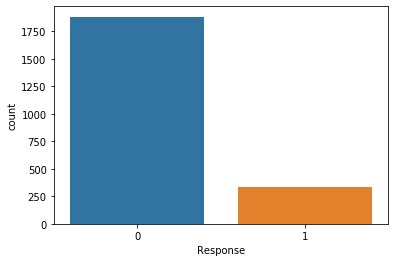

In [26]:
#plt.figure(figsize=(28, 6))
sns.countplot(x="Response", data=data)

* Most of the customers didn't accepted the offer in the last campaign

In [27]:
print (list(data.columns))

['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Total_kids']


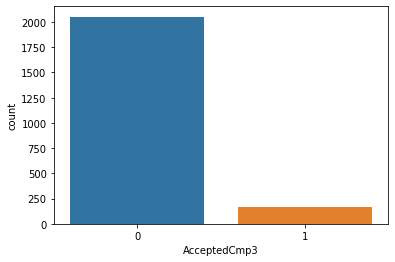

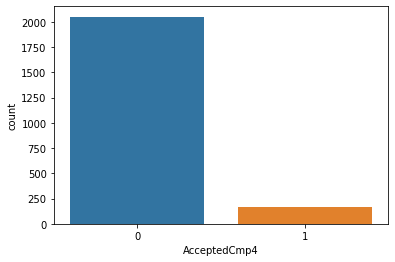

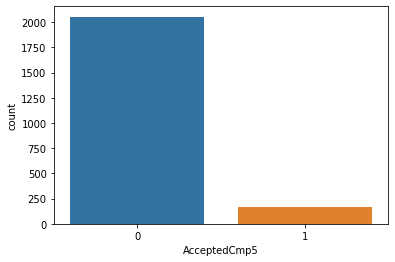

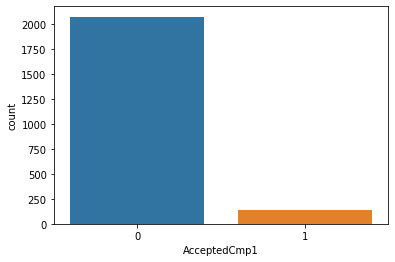

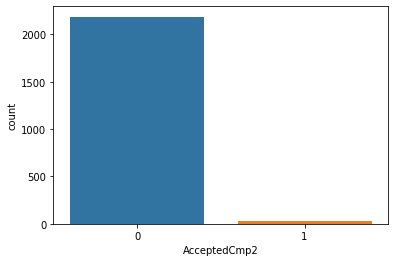

In [28]:
accepted = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']

for x in accepted:
    sns.countplot(data[x])
    plt.show()

#### *  We can say that in allmost all complain the offers are not accepted by the customers

In [29]:
data['NumTotalPurchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'] 
+ data['NumDealsPurchases']

0       3
1       2
2       1
3       2
4       5
       ..
2235    2
2236    7
2237    1
2238    2
2239    3
Name: NumDealsPurchases, Length: 2216, dtype: int64

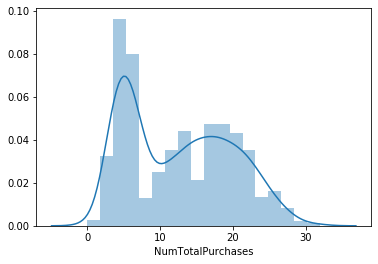

In [30]:
sns.distplot(data["NumTotalPurchases"])

In [31]:
data['Expenditure'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] 
+ data['MntGoldProds']

0        88
1         6
2        42
3         5
4        15
       ... 
2235    247
2236      8
2237     24
2238     61
2239     21
Name: MntGoldProds, Length: 2216, dtype: int64

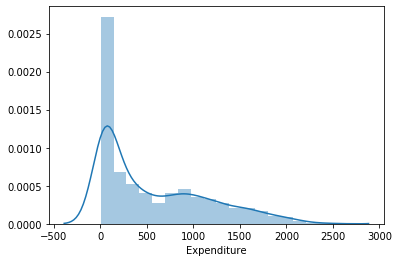

In [32]:
sns.distplot(data["Expenditure"])

In [33]:
data['TotalAcceptedCmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] 
+ data['AcceptedCmp4'] + data['AcceptedCmp5']


0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    1
2238    0
2239    0
Length: 2216, dtype: int64

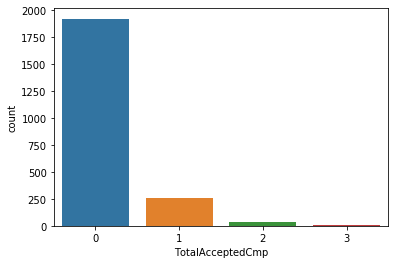

In [34]:
sns.countplot(data["TotalAcceptedCmp"])

In [35]:
# Deleting the columns 
column_to_del = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5",
              "NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases",
              "NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", 
              "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
data=data.drop(columns=column_to_del,axis=1)
print(data.columns)
data.head()

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Dt_Customer', 'Recency', 'Complain', 'Response', 'Total_kids',
       'NumTotalPurchases', 'Expenditure', 'TotalAcceptedCmp'],
      dtype='object')


,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Response,Total_kids,NumTotalPurchases,Expenditure,TotalAcceptedCmp
0,5524,1957,Under Graduate,Single,58138.0,04-09-2012,58,0,1,0,22,1529,0
1,2174,1954,Under Graduate,Single,46344.0,08-03-2014,38,0,0,2,4,21,0
2,4141,1965,Under Graduate,Relationship,71613.0,21-08-2013,26,0,0,0,20,734,0
3,6182,1984,Under Graduate,Relationship,26646.0,10-02-2014,26,0,0,1,6,48,0
4,5324,1981,Post Graduate,Relationship,58293.0,19-01-2014,94,0,0,1,14,407,0


In [36]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [37]:
data['Dt_Customer'].describe()

count                    2216
unique                    662
top       2012-08-31 00:00:00
freq                       12
first     2012-01-08 00:00:00
last      2014-12-06 00:00:00
Name: Dt_Customer, dtype: object

In [38]:
data['first_date'] = pd.to_datetime('01-01-2015')
data['days_engaged'] = (data['first_date'] - data['Dt_Customer']).dt.days

In [39]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Response,Total_kids,NumTotalPurchases,Expenditure,TotalAcceptedCmp,first_date,days_engaged
0,5524,1957,Under Graduate,Single,58138.0,2012-04-09,58,0,1,0,22,1529,0,2015-01-01,997
1,2174,1954,Under Graduate,Single,46344.0,2014-08-03,38,0,0,2,4,21,0,2015-01-01,151
2,4141,1965,Under Graduate,Relationship,71613.0,2013-08-21,26,0,0,0,20,734,0,2015-01-01,498
3,6182,1984,Under Graduate,Relationship,26646.0,2014-10-02,26,0,0,1,6,48,0,2015-01-01,91
4,5324,1981,Post Graduate,Relationship,58293.0,2014-01-19,94,0,0,1,14,407,0,2015-01-01,347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Under Graduate,Relationship,61223.0,2013-06-13,46,0,0,1,16,1094,0,2015-01-01,567
2236,4001,1946,Post Graduate,Relationship,64014.0,2014-10-06,56,0,0,3,15,436,1,2015-01-01,87
2237,7270,1981,Under Graduate,Single,56981.0,2014-01-25,91,0,0,0,18,1217,0,2015-01-01,341
2238,8235,1956,Post Graduate,Relationship,69245.0,2014-01-24,8,0,0,1,21,782,0,2015-01-01,342


In [40]:
data.drop(['first_date','ID','Dt_Customer'],axis=1,inplace=True)

In [41]:
# Getting all the categorical variable

catg_col=[]
for i in data.columns:
    if(data[i].dtype =='object'):
        catg_col.append(i)
        
print(catg_col)

['Education', 'Marital_Status']


In [42]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
for i in catg_col:
    data[i]= encoder.fit_transform(data[i])

data.info()

In [43]:
# Implement standardization of features

from sklearn.preprocessing import StandardScaler
scale_data = StandardScaler()
val = scale_data.fit_transform(data.values)
data_final = pd.DataFrame(val, columns=data.columns)

In [44]:
data_final

,Year_Birth,Education,Marital_Status,Income,Recency,Complain,Response,Total_kids,NumTotalPurchases,Expenditure,TotalAcceptedCmp,days_engaged
0,-0.986443,0.945525,1.348829,0.234063,0.310532,-0.097812,2.377952,-1.264803,1.310941,1.673832,-0.368791,1.974875
1,-1.236801,0.945525,1.348829,-0.234559,-0.380509,-0.097812,-0.420530,1.405806,-1.188023,-0.939446,-0.368791,-1.665141
2,-0.318822,0.945525,-0.741384,0.769478,-0.795134,-0.097812,-0.420530,-1.264803,1.033278,0.296142,-0.368791,-0.172132
3,1.266777,0.945525,-0.741384,-1.017239,-0.795134,-0.097812,-0.420530,0.070501,-0.910360,-0.892656,-0.368791,-1.923298
4,1.016420,-1.057614,-0.741384,0.240221,1.554407,-0.097812,-0.420530,0.070501,0.200291,-0.270530,-0.368791,-0.821827
...,...,...,...,...,...,...,...,...,...,...,...,...
2211,-0.151917,0.945525,-0.741384,0.356642,-0.104093,-0.097812,-0.420530,0.070501,0.477953,0.920002,-0.368791,0.124749
2212,-1.904422,-1.057614,-0.741384,0.467539,0.241428,-0.097812,-0.420530,2.741110,0.339122,-0.220275,2.070733,-1.940508
2213,1.016420,0.945525,1.348829,0.188091,1.450751,-0.097812,-0.420530,-1.264803,0.755616,1.133154,-0.368791,-0.847643
2214,-1.069896,-1.057614,-0.741384,0.675388,-1.417072,-0.097812,-0.420530,0.070501,1.172110,0.379324,-0.368791,-0.843341


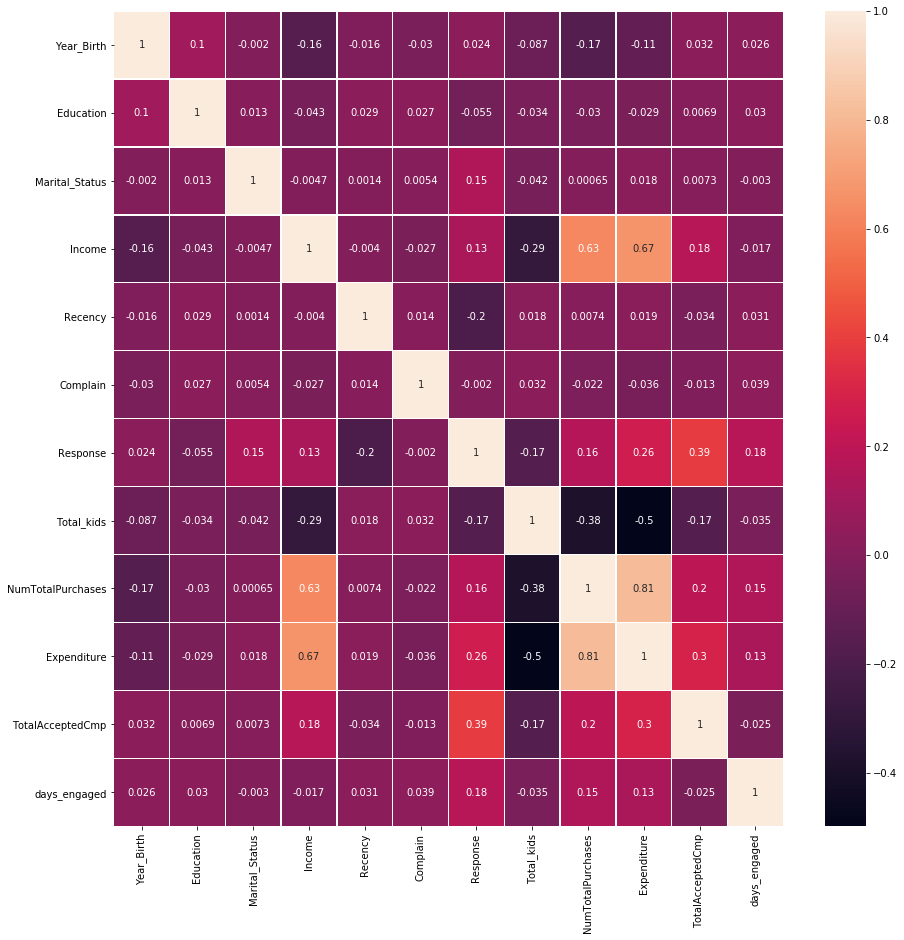

In [45]:
# Determining correlation between all correlation
plt.figure(figsize=(15,15))
sns.heatmap(data_final.corr(),annot=True,linewidths=0.5)

In [46]:
X = data_final.iloc[:,:]

In [47]:
X

,Year_Birth,Education,Marital_Status,Income,Recency,Complain,Response,Total_kids,NumTotalPurchases,Expenditure,TotalAcceptedCmp,days_engaged
0,-0.986443,0.945525,1.348829,0.234063,0.310532,-0.097812,2.377952,-1.264803,1.310941,1.673832,-0.368791,1.974875
1,-1.236801,0.945525,1.348829,-0.234559,-0.380509,-0.097812,-0.420530,1.405806,-1.188023,-0.939446,-0.368791,-1.665141
2,-0.318822,0.945525,-0.741384,0.769478,-0.795134,-0.097812,-0.420530,-1.264803,1.033278,0.296142,-0.368791,-0.172132
3,1.266777,0.945525,-0.741384,-1.017239,-0.795134,-0.097812,-0.420530,0.070501,-0.910360,-0.892656,-0.368791,-1.923298
4,1.016420,-1.057614,-0.741384,0.240221,1.554407,-0.097812,-0.420530,0.070501,0.200291,-0.270530,-0.368791,-0.821827
...,...,...,...,...,...,...,...,...,...,...,...,...
2211,-0.151917,0.945525,-0.741384,0.356642,-0.104093,-0.097812,-0.420530,0.070501,0.477953,0.920002,-0.368791,0.124749
2212,-1.904422,-1.057614,-0.741384,0.467539,0.241428,-0.097812,-0.420530,2.741110,0.339122,-0.220275,2.070733,-1.940508
2213,1.016420,0.945525,1.348829,0.188091,1.450751,-0.097812,-0.420530,-1.264803,0.755616,1.133154,-0.368791,-0.847643
2214,-1.069896,-1.057614,-0.741384,0.675388,-1.417072,-0.097812,-0.420530,0.070501,1.172110,0.379324,-0.368791,-0.843341


In [48]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

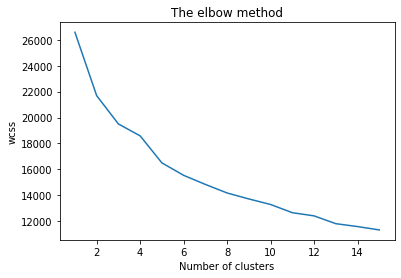

In [49]:
plt.plot(range(1,16), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

* I think 4 is the optimal number of clusters.

* According to the elbow rule plot, 4 or 5 clusters could be optimal

* Looking on the silhouette coefficient visualisation, 4 clusters provides relatively high silhouette scores for each cluster.

In [50]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(X)

pred = kmeans.predict(X)

# data_cleaned_clustered = data_cleaned.copy()
# data_cleaned_clustered['Cluster'] = pred + 1

In [51]:
pred

array([1, 0, 3, ..., 3, 3, 2])

In [52]:
data_clustered = data_final.copy()
data_clustered['Cluster'] = pred + 1

In [53]:
data_in = data.copy()
data_in['Cluster'] = pred + 1

In [54]:
data_clustered

,Year_Birth,Education,Marital_Status,Income,Recency,Complain,Response,Total_kids,NumTotalPurchases,Expenditure,TotalAcceptedCmp,days_engaged,Cluster
0,-0.986443,0.945525,1.348829,0.234063,0.310532,-0.097812,2.377952,-1.264803,1.310941,1.673832,-0.368791,1.974875,2
1,-1.236801,0.945525,1.348829,-0.234559,-0.380509,-0.097812,-0.420530,1.405806,-1.188023,-0.939446,-0.368791,-1.665141,1
2,-0.318822,0.945525,-0.741384,0.769478,-0.795134,-0.097812,-0.420530,-1.264803,1.033278,0.296142,-0.368791,-0.172132,4
3,1.266777,0.945525,-0.741384,-1.017239,-0.795134,-0.097812,-0.420530,0.070501,-0.910360,-0.892656,-0.368791,-1.923298,1
4,1.016420,-1.057614,-0.741384,0.240221,1.554407,-0.097812,-0.420530,0.070501,0.200291,-0.270530,-0.368791,-0.821827,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,-0.151917,0.945525,-0.741384,0.356642,-0.104093,-0.097812,-0.420530,0.070501,0.477953,0.920002,-0.368791,0.124749,4
2212,-1.904422,-1.057614,-0.741384,0.467539,0.241428,-0.097812,-0.420530,2.741110,0.339122,-0.220275,2.070733,-1.940508,3
2213,1.016420,0.945525,1.348829,0.188091,1.450751,-0.097812,-0.420530,-1.264803,0.755616,1.133154,-0.368791,-0.847643,4
2214,-1.069896,-1.057614,-0.741384,0.675388,-1.417072,-0.097812,-0.420530,0.070501,1.172110,0.379324,-0.368791,-0.843341,4


### Key Points

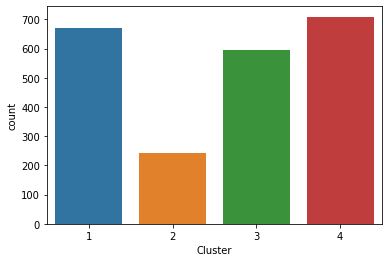

In [55]:
sns.countplot(data_clustered['Cluster'])

In [64]:
data_clustered['Cluster'].value_counts()

4    709
1    670
3    594
2    243
Name: Cluster, dtype: int64

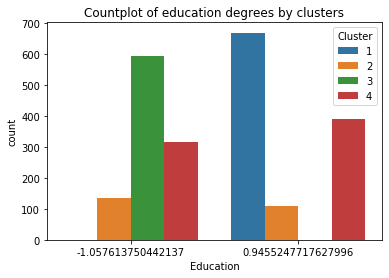

In [56]:
plt.title(f'Countplot of education degrees by clusters')
sns.countplot(data=data_clustered, x='Education', hue='Cluster')
plt.show()

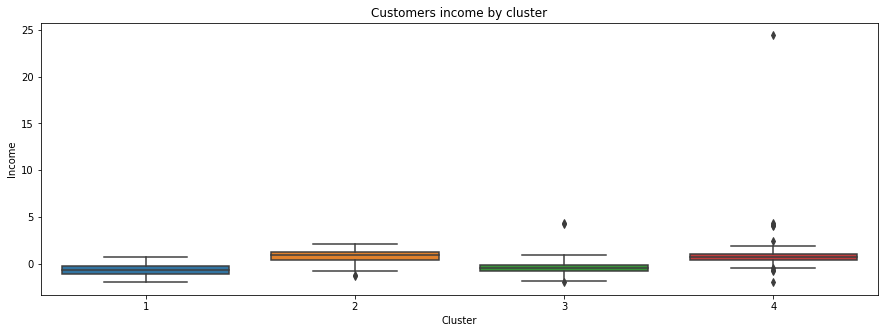

In [58]:
plt.figure(figsize=(15,5))
plt.title(f'Customers income by cluster')
ax = sns.boxplot(data=data_clustered, x='Cluster', y='Income')
plt.show()

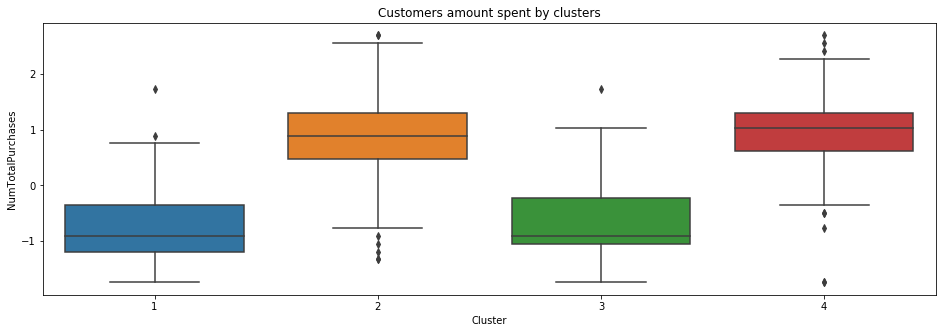

In [59]:
plt.figure(figsize=(16,5))
plt.title(f'Customers amount spent by clusters')
ax = sns.boxplot(data=data_clustered, x='Cluster', y='NumTotalPurchases')
plt.show()

Cluster 1 and 3 customers are the most active and frequent buyers, cluster 4 have medium frequency, and cluster 1 has low frequency of purchases

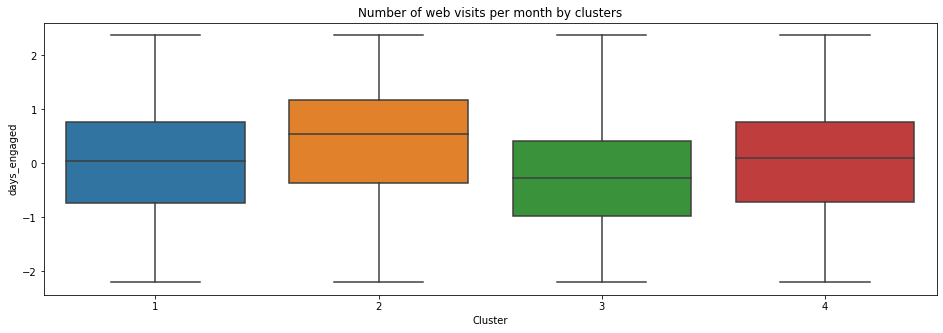

In [60]:
plt.figure(figsize=(16,5))
plt.title(f'Number of web visits per month by clusters')
ax = sns.boxplot(data=data_clustered, x='Cluster', y='days_engaged')
plt.show()

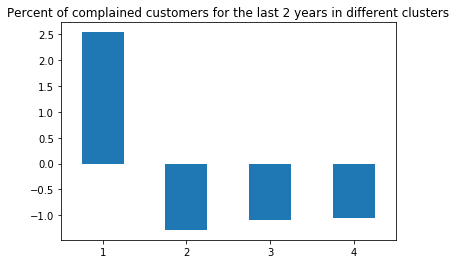

In [61]:
complains_by_cluster = (data_clustered.groupby(by='Cluster')['Complain'].sum()
                                      .divide(data_clustered['Cluster'].value_counts())
                                      .multiply(100))

ax = complains_by_cluster.plot(kind='bar', 
                               title='Percent of complained customers for the last 2 years in different clusters')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.show()

### XGBoost classification model

In [75]:
x = data_clustered.drop('Cluster',axis=1)
y = data_clustered['Cluster']

In [79]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30,random_state=42)

In [84]:
from xgboost import XGBRFClassifier

In [85]:
XG_model = XGBRFClassifier()

In [86]:
XG_model.fit(x_train,y_train)

XGBRFClassifier(objective='multi:softprob')

In [93]:
predictions = XG_model.predict(x_test)


In [94]:
predictions

array([4, 3, 3, 4, 1, 2, 4, 4, 1, 4, 3, 1, 3, 4, 1, 4, 1, 4, 1, 4, 2, 1,
       3, 3, 4, 2, 4, 3, 4, 4, 1, 4, 3, 3, 1, 3, 2, 3, 4, 4, 4, 3, 2, 1,
       4, 3, 1, 1, 3, 3, 4, 1, 1, 4, 4, 4, 2, 4, 3, 3, 4, 1, 3, 3, 2, 2,
       3, 4, 2, 3, 4, 4, 1, 1, 3, 3, 4, 4, 1, 4, 2, 4, 3, 4, 3, 1, 4, 1,
       4, 3, 4, 3, 4, 1, 4, 2, 2, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 3, 4, 3,
       3, 4, 3, 4, 4, 3, 3, 1, 2, 4, 4, 4, 4, 1, 1, 1, 1, 4, 3, 3, 3, 3,
       4, 1, 3, 4, 1, 1, 4, 2, 1, 1, 1, 3, 2, 3, 4, 4, 3, 4, 1, 1, 1, 4,
       4, 1, 3, 1, 1, 1, 1, 1, 3, 4, 4, 2, 1, 4, 4, 1, 4, 4, 3, 3, 4, 4,
       3, 4, 3, 2, 1, 1, 3, 1, 3, 1, 2, 1, 1, 1, 1, 4, 1, 1, 3, 3, 1, 1,
       4, 4, 4, 1, 3, 2, 1, 4, 2, 2, 3, 1, 1, 3, 3, 1, 3, 3, 1, 3, 3, 4,
       4, 1, 4, 2, 4, 3, 1, 1, 1, 4, 1, 4, 4, 1, 3, 4, 3, 3, 4, 1, 1, 4,
       4, 4, 1, 4, 4, 1, 1, 4, 3, 3, 2, 1, 1, 4, 1, 1, 1, 4, 4, 1, 3, 1,
       4, 1, 4, 3, 4, 3, 2, 3, 2, 3, 1, 4, 2, 4, 3, 4, 1, 2, 3, 4, 1, 4,
       1, 3, 4, 1, 4, 3, 2, 4, 1, 1, 2, 1, 1, 1, 2,

In [95]:
XG_model.score(x_test,y_pre)

1.0

In [97]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)
accuracy

0.9518796992481203

In [99]:
import shap

# SHapley Additive exPlanations
# The goal of SHAP is to explain the prediction of an instance x by computing the contribution of 
# each feature to the prediction. The SHAP explanation method computes Shapley values from coalitional game theory. 
# The feature values of a data instance act as players in a coalition. Shapley values tell us how to fairly 
# distribute the "payout" (= the prediction) among the features.

#### Variable Importance Plot 

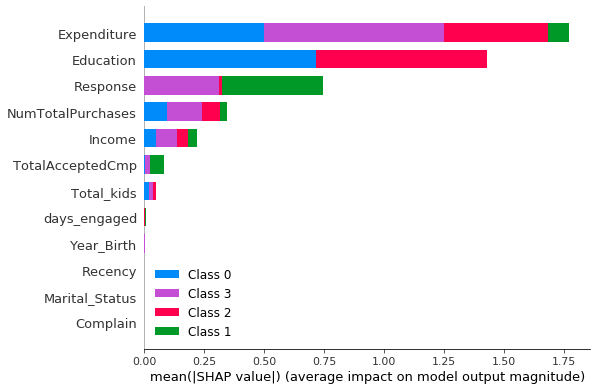

In [103]:
shap_values = shap.TreeExplainer(XG_model).shap_values(x_train)
shap.summary_plot(shap_values, x_train, plot_type="bar")

* The variable importance plot will tell us which feature is important for the prediction of output variable
* This gives info about which feature are more important for correct prediction

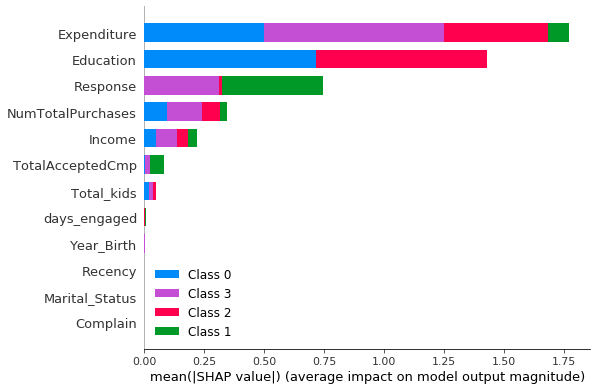

In [130]:
f = plt.figure()
shap.summary_plot(shap_values, X_test)

#### *Dependency Plot

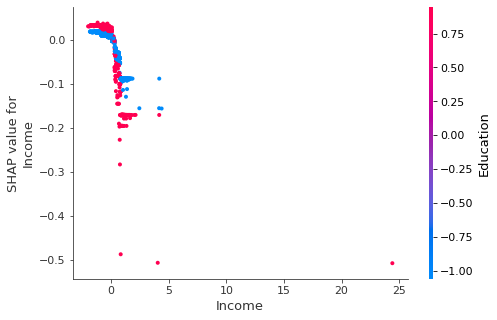

In [143]:
shap.dependence_plot("Income", shap_values[0], x_train)

* Dependency Plot will tell us the dependency of a feature with other 
* Relaptionship between two features

* We have other pots like "individual SHAP Value Plot" and other plots which helps us to analyse the model we created